In [1]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')

from datetime import datetime
from tqdm import tqdm
from collections import Counter
import swifter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [4]:
path = Fontmanager()

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [5]:
women_policy = pd.read_csv('dataset/women_policy_sm_best.csv')
minister = pd.read_csv('dataset/minister_sm_best.csv')
repeal = pd.read_csv('dataset/repeal_sm_best.csv')

In [6]:
# 혹시 모를 중복제거
women_policy = women_policy.drop_duplicates()
minister = minister.drop_duplicates()
repeal = repeal.drop_duplicates()

In [7]:
# 혹시 모를 nan값 확인
women_policy.isna().sum()

datetime       0
id             0
text           0
username       0
tokenized      0
label          0
score          0
label_word     0
text_re        0
multi_label    0
sm_label       0
sm_score       0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
dtype: int64

In [8]:
minister.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
sm_label       0
sm_score       0
dtype: int64

In [9]:
repeal.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
여성/가족          0
남성             0
성소수자           0
인종/국적          0
연령             0
지역             0
종교             0
기타 혐오          0
악플/욕설          0
clean          0
sm_label       0
sm_score       0
dtype: int64

In [10]:
repeal = repeal.dropna()

In [11]:
repeal = repeal[repeal['username'] != 'miganHeart']

In [12]:
repeal = repeal[~repeal['text'].str.contains('#자격증')]
repeal = repeal[~repeal['text'].str.contains('#PIA사설탐정')]

In [13]:
repeal = repeal[repeal['username'] != 'OhmyNews_Korea']

In [14]:
minister = minister[minister['username'] != 'OhmyNews_Korea']

In [15]:
women_policy = women_policy[women_policy['username'] != 'OhmyNews_Korea']

In [16]:
name_list = ['women_policy', 'minister', 'repeal']
data_list = [women_policy, minister, repeal]

## hashtag

In [17]:
def hashtag_preprocessing(df,column):
    texts = df[column.str.contains('#')]
    texts['text_t'] = texts['text'].str.split()
    word_of_Bag = sum(texts['text_t'], [])
    word_of_Bag = [word for word in word_of_Bag if word.startswith('#') != False]
    word_of_Bag = [word for word in word_of_Bag if not (len(word) == 0)]
    return word_of_Bag

In [18]:
def hashtag_count(word_of_bag):
    set_wob = set(word_of_bag)
    list_wob = list(set_wob)
    key = list_wob
    value = [word_of_bag.count(i) for i in list_wob]
    df = pd.DataFrame({'key':key, 'value':value})
    df = df[df['value'] > 5]
    return df

In [19]:
def hashtag_graph(df, title):
    plt.figure(figsize=(20, 10))
    plot = sns.barplot(df['key'], df['value'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title('most common hashtag', fontsize=20)
    plt.legend(fontsize=15)
    save_fig(f'{title}' + '_hashtag')

<ipython-input-17-572442dfe633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text_t'] = texts['text'].str.split()
No handles with labels found to put in legend.


그림 저장: women_policy_hashtag


<ipython-input-17-572442dfe633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text_t'] = texts['text'].str.split()
No handles with labels found to put in legend.


그림 저장: minister_hashtag


<ipython-input-17-572442dfe633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text_t'] = texts['text'].str.split()
No handles with labels found to put in legend.


그림 저장: repeal_hashtag


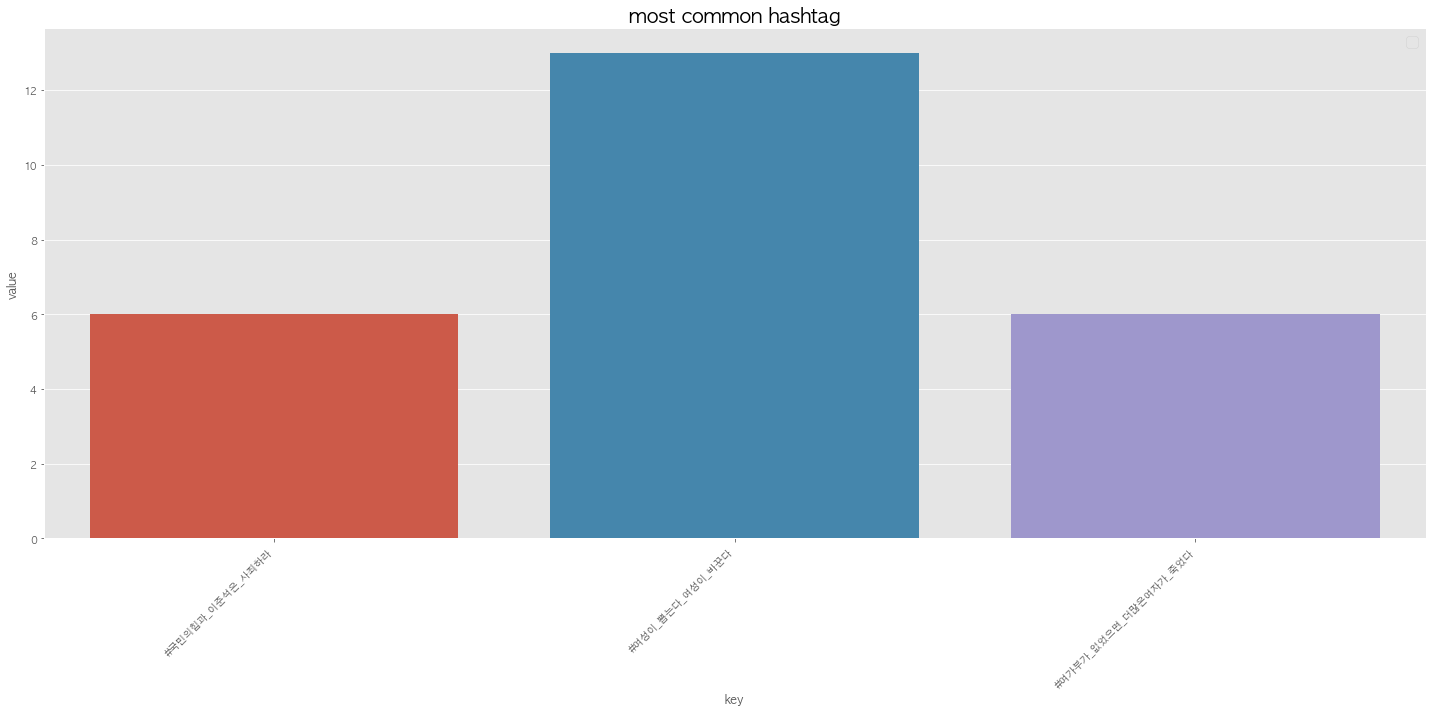

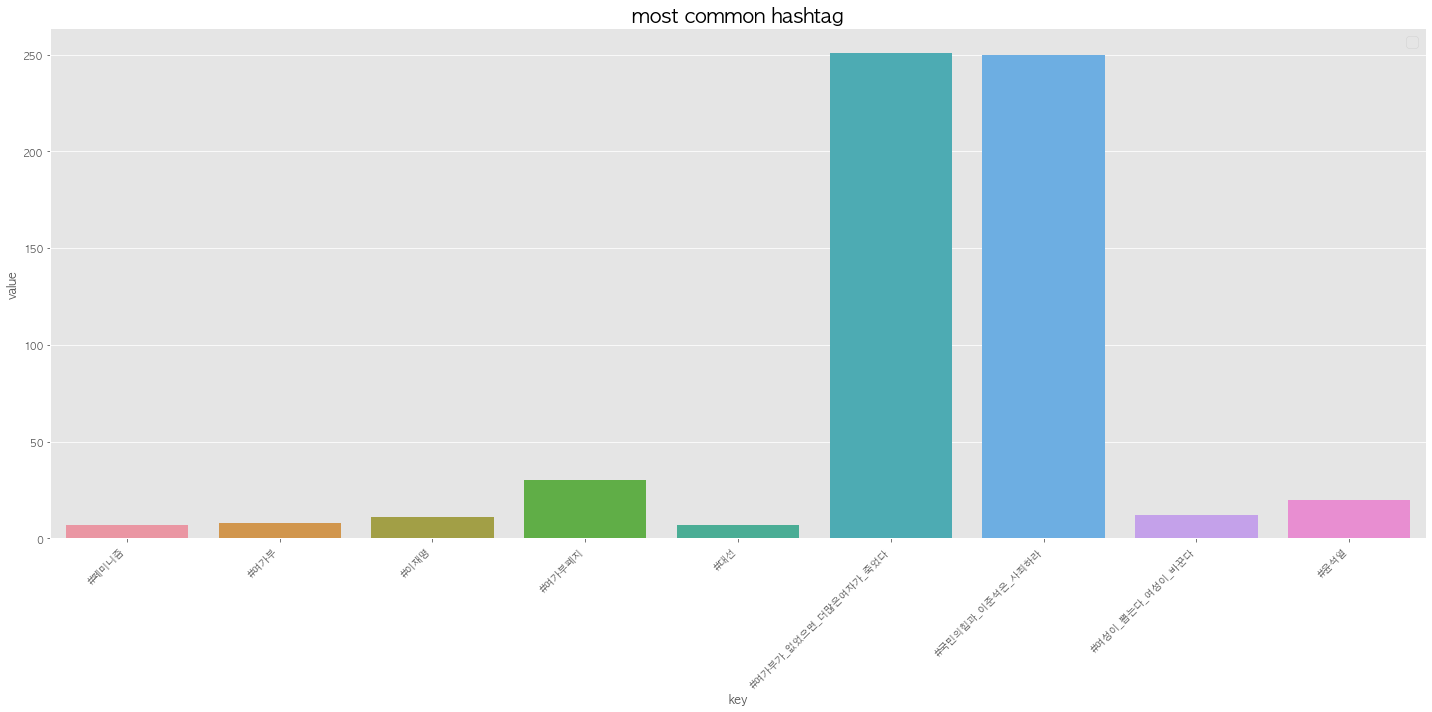

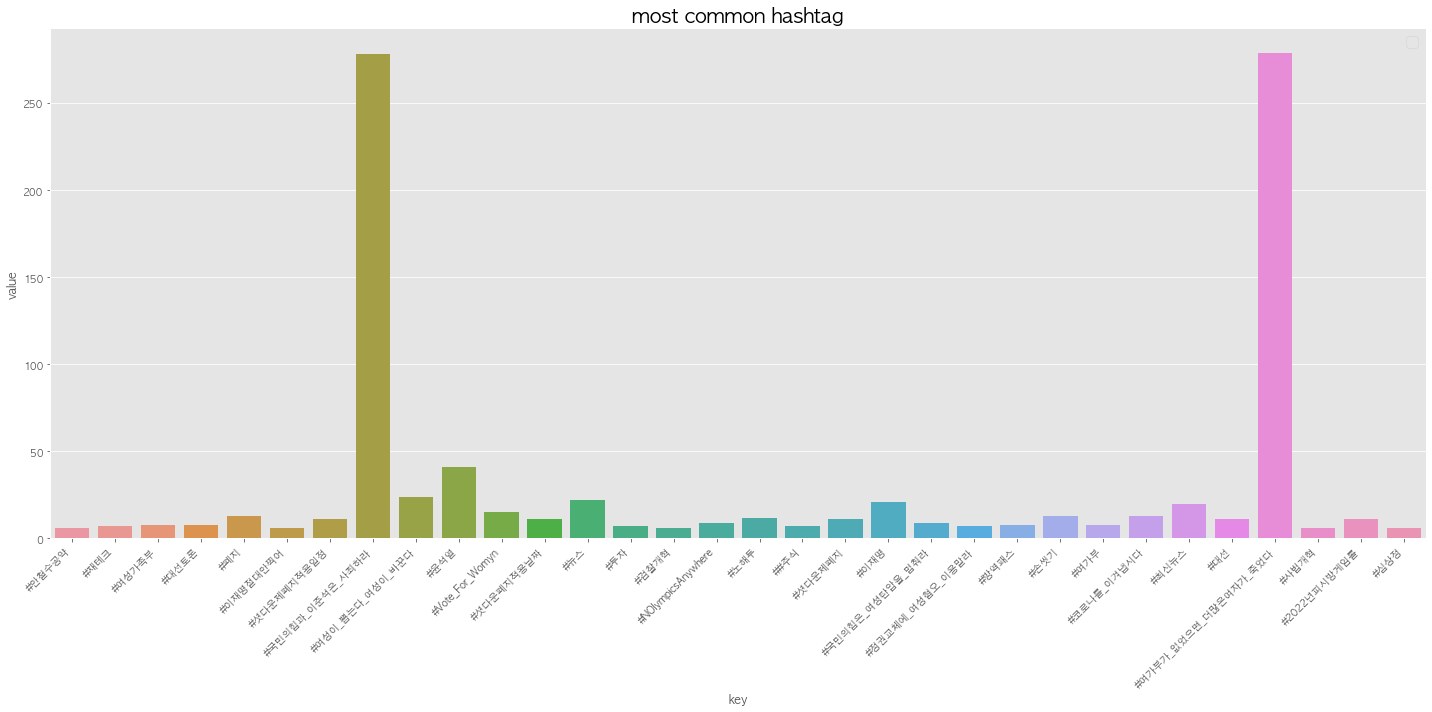

In [20]:
for idx, df in enumerate (data_list):
    word_of_Bag = hashtag_preprocessing(df, df['text'])
    df = hashtag_count(word_of_Bag)
    hashtag_graph(df, name_list[idx])

### 전처리

In [22]:
# 정규표현식 이용한 전처리
def clean(text):
    #\n 공백 제거
    text = re.sub('\n',' ',str(text))
    # &gt; &lt; &amp;
    text = re.sub('[&]+[a-z]+', '', str(text))
    # URL 제거
    text = re.sub('https://[A-Za-z0-9./]*','',str(text))
    # 한글자 제거 (ex:ㅋㅋ, ㅜㅜ)
    text = re.sub('([ㄱ-ㅎㅏ-ㅣ])+', '', str(text))
    # 숫자 제거 (숫자 + 숫자만 제거, ex: 1인가족)
    text= re.sub('[0-9]{2}', '', str(text))
    # @알파벳 제거 
    text = re.sub('@[A-Za-z0-9./]*','',str(text))
#     # 숫자 문자외 제거
#     text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    return str(text)

## who did tweet the most

In [23]:
def most_graph(df, title):
    plt.figure(figsize=(20,10))
    sns.barplot(x=df['username'].value_counts()[:20].values, 
                y=df['username'].value_counts()[:20].index,
               orient='h')
    plt.title('Top 20 who the most writes', fontsize=20)
    plt.axvline(x=np.average(df['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
                label='avg')
    plt.legend(fontsize=15)
    save_fig(f'{title}' + '_tweet_most')

그림 저장: women_policy_tweet_most
그림 저장: minister_tweet_most
그림 저장: repeal_tweet_most


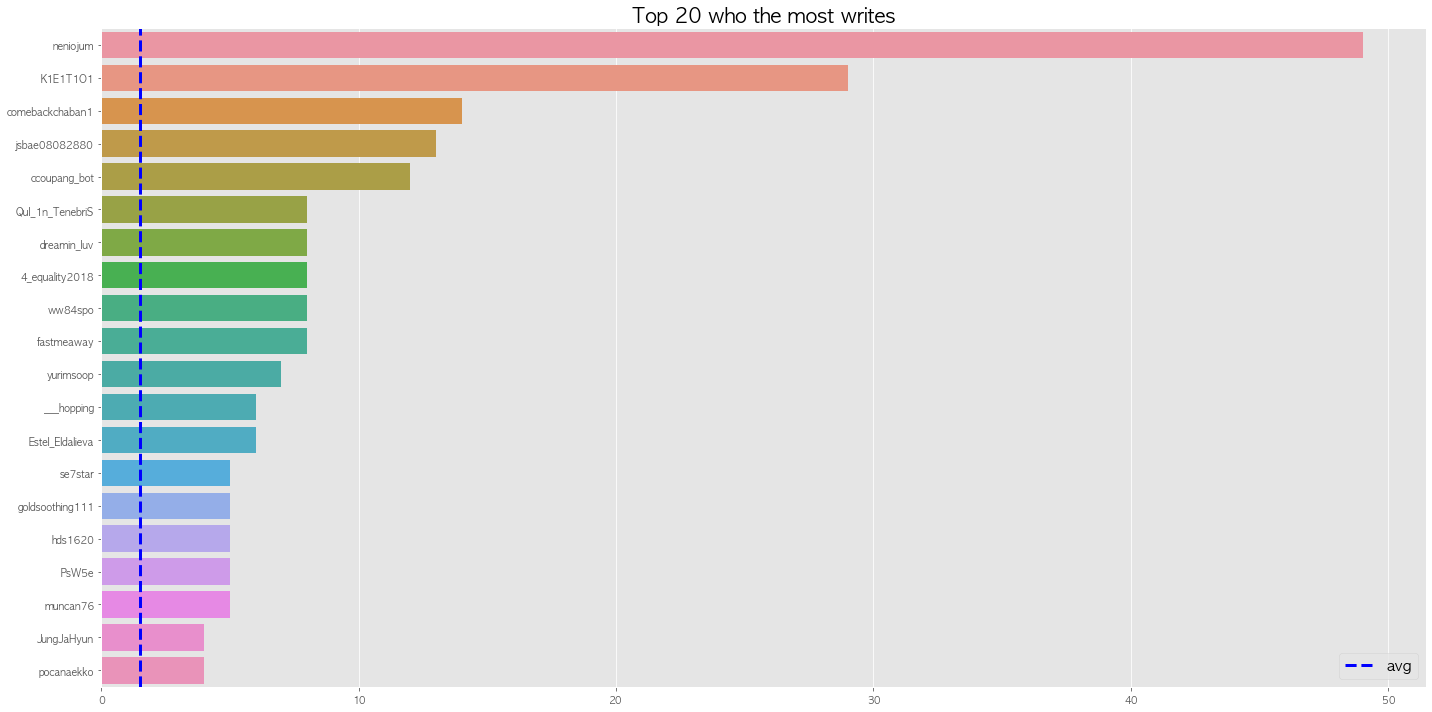

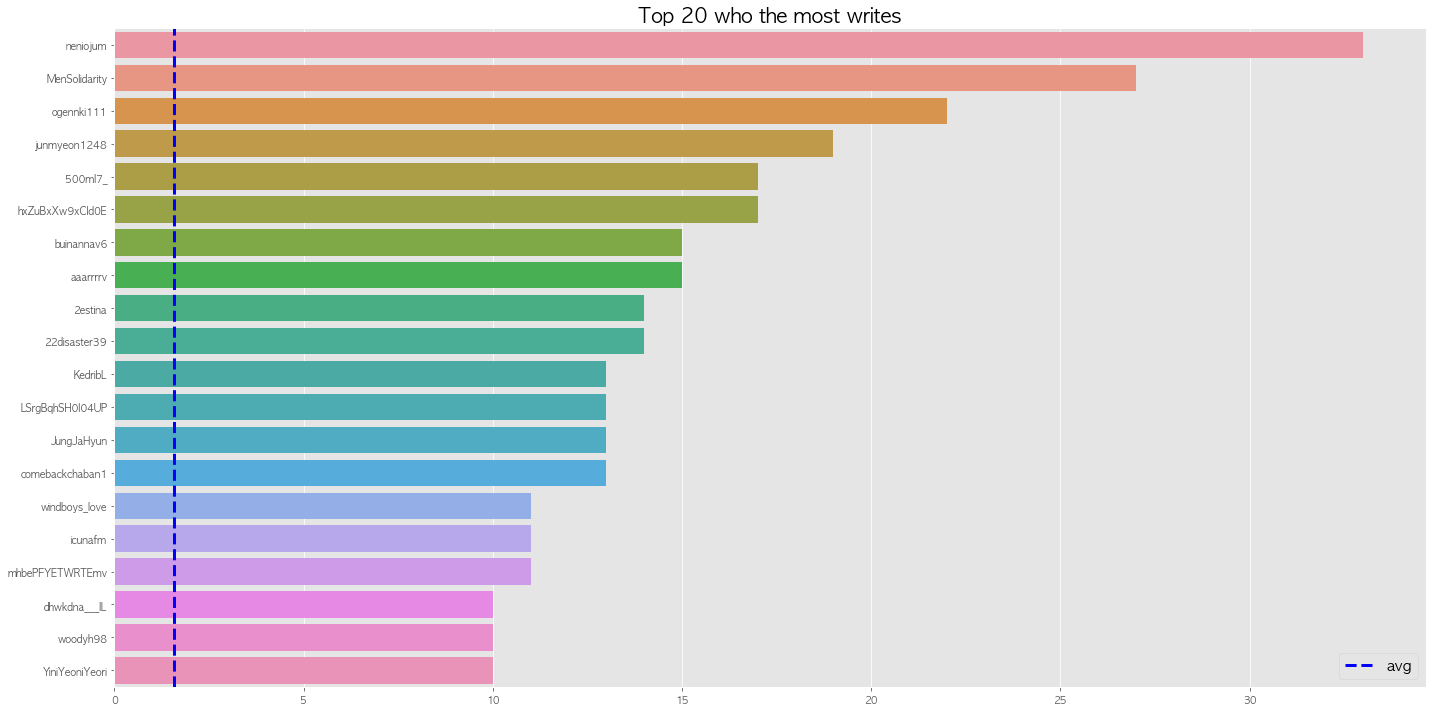

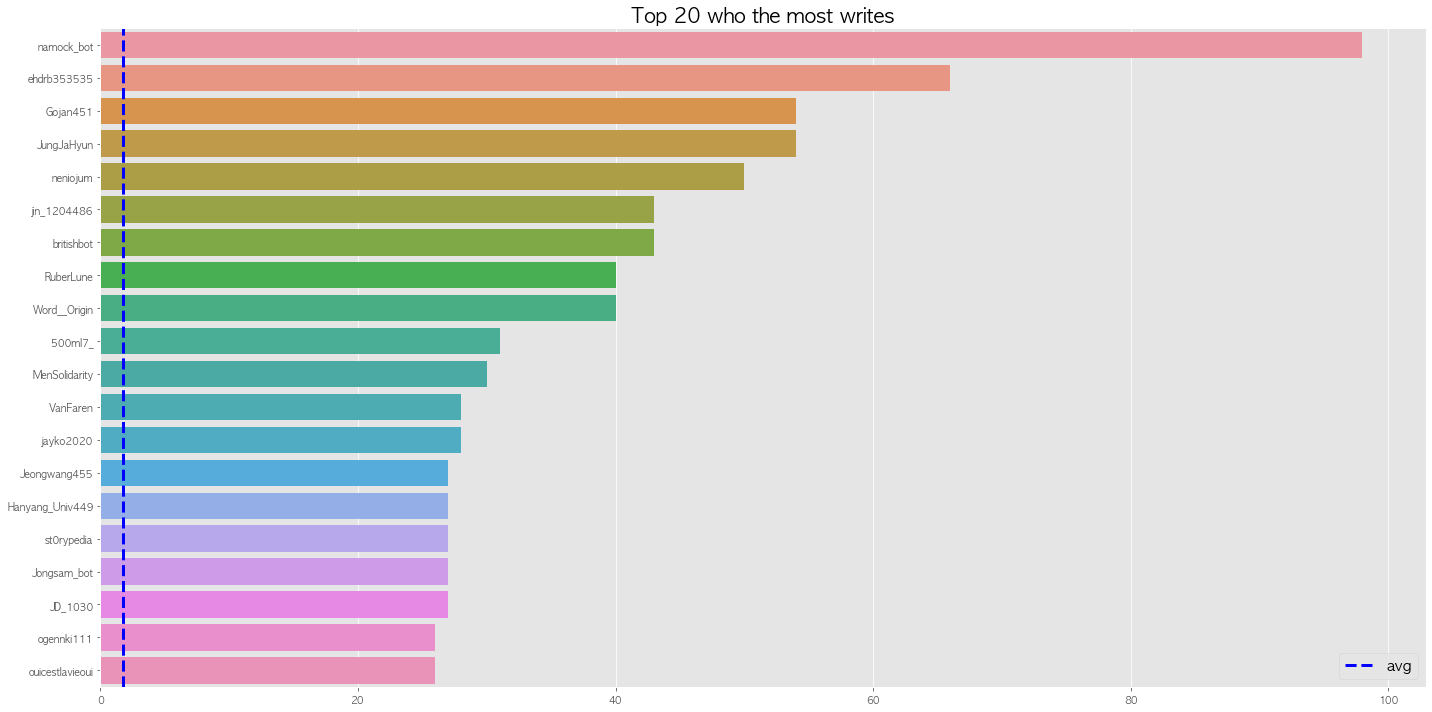

In [24]:
for idx, df in enumerate (data_list):
    df['text'] = df['text'].apply(lambda x:clean(x))
    most_graph(df, name_list[idx])

## the lengths of the sentences

In [25]:
def lengths_graph(df, title):
    plt.figure(figsize=(20,10))
    sns.distplot(a=df['text'].str.len(), bins=70, kde=True,
                 kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
    plt.title('text length distribution', fontsize=20)
    plt.axvline(x=np.average(df['text'].str.len()), color='b', linestyle='--', linewidth=3, 
                label='avg')
    plt.legend(fontsize=15)
    save_fig(f'{title}' + '_lengths_sec')

그림 저장: women_policy_lengths_sec
그림 저장: minister_lengths_sec
그림 저장: repeal_lengths_sec


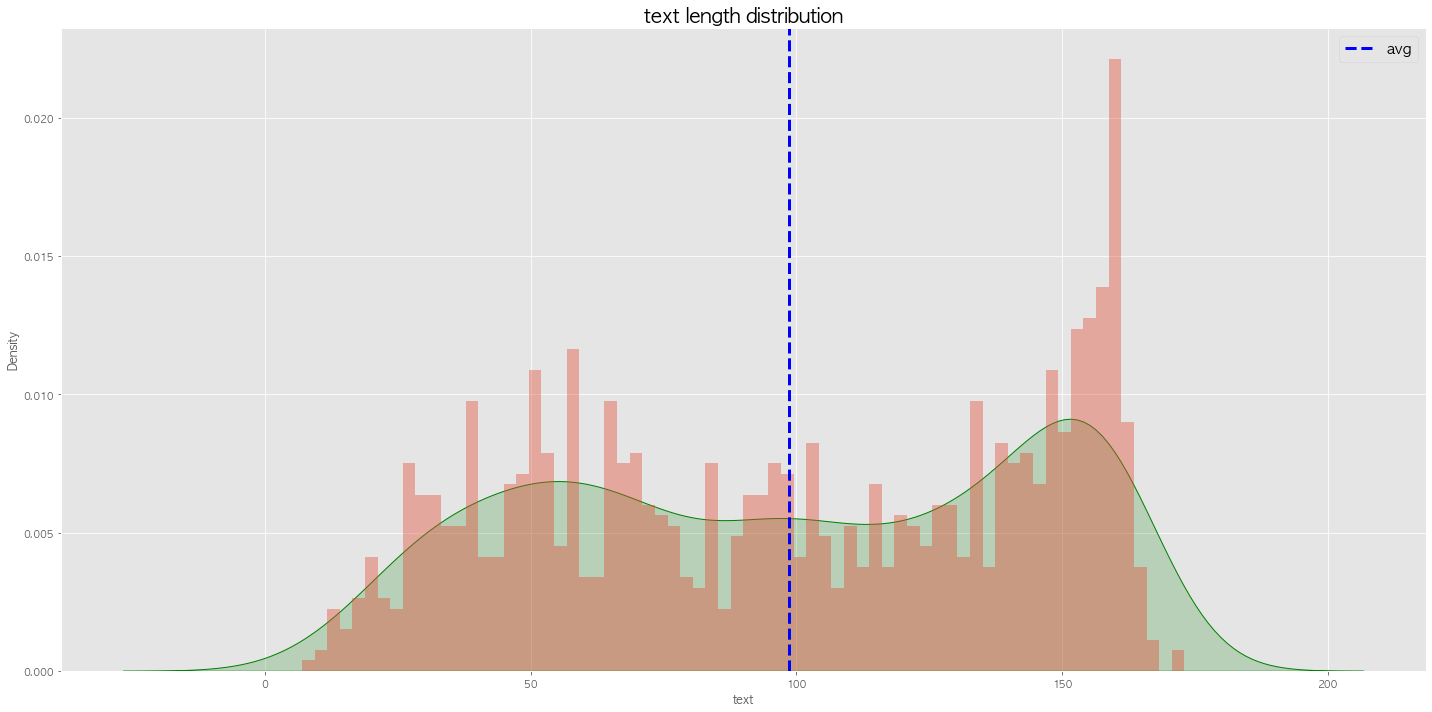

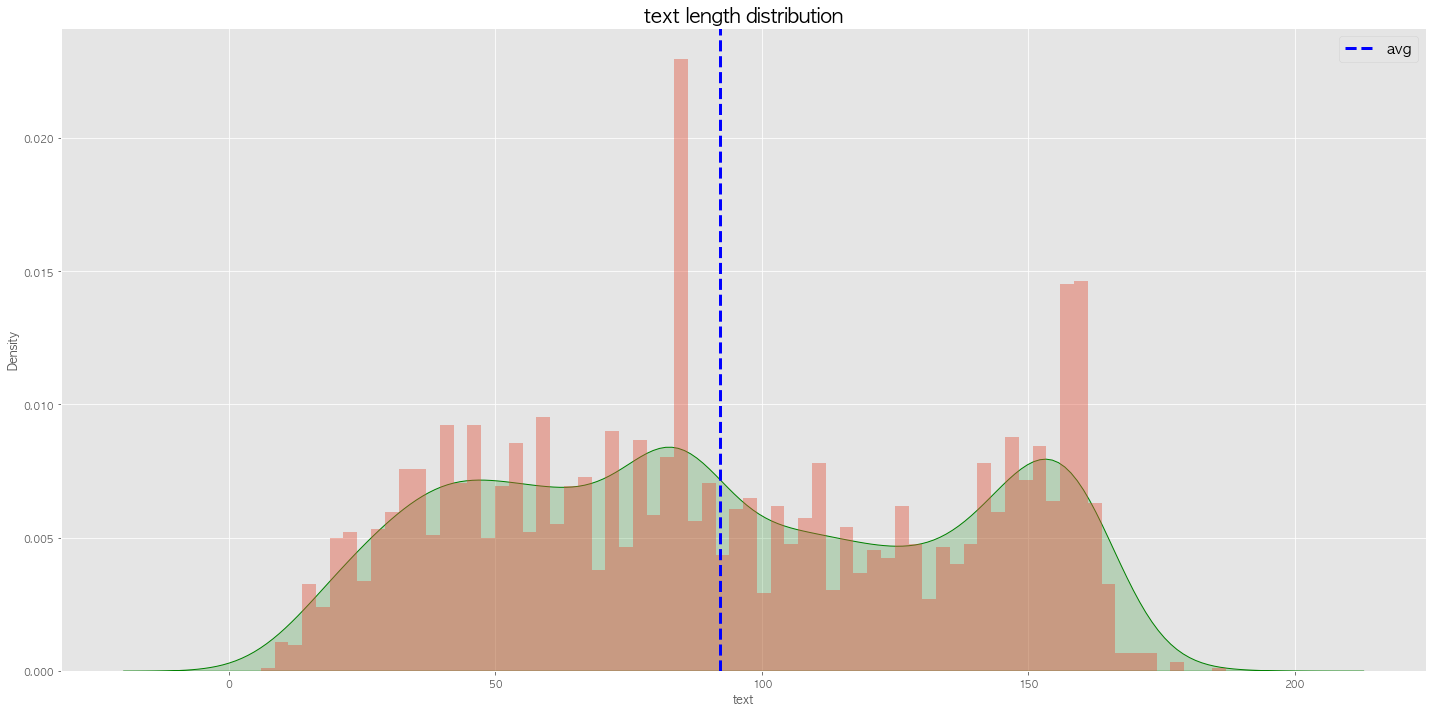

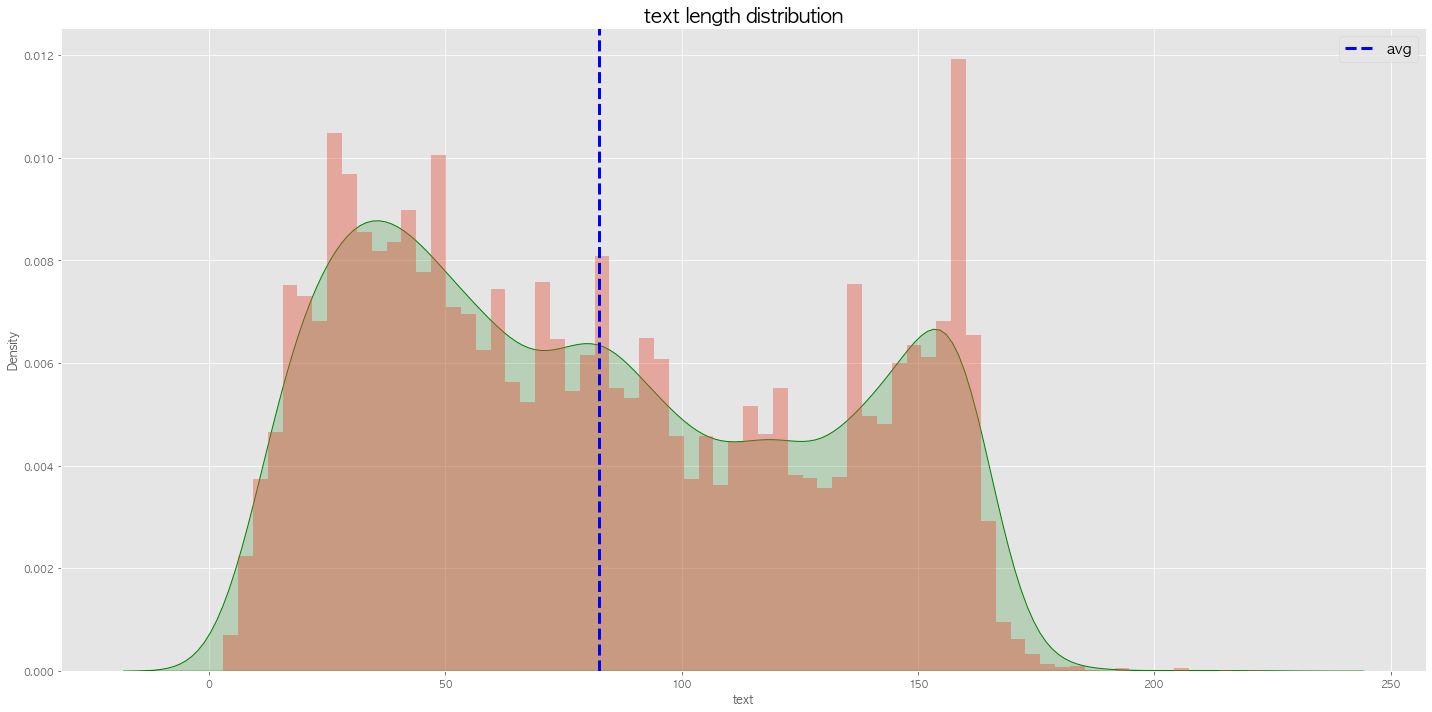

In [26]:
for idx, df in enumerate (data_list):
    lengths_graph(df, name_list[idx])

### Tokenizing

------------

In [27]:
# tokenizerb
mecab = Mecab()

# stopwords list
stop_words = pd.read_csv('dataset/한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])

In [28]:
def preprocessing_mecab(sentence):
    #### Tokenize
    morphs = mecab.pos(sentence)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [29]:
for idx, df in enumerate (data_list):
    df['tokenized'] = df['text'].apply(lambda x:preprocessing_mecab(x))
    df['tokenized'] = df['tokenized'].apply(lambda x:[item for item in x if item not in stop_words])

## wordcloud

In [30]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def wordcloud(c, title):
    wc = WordCloud(font_path='Arial Unicode', width=1000, height=1000, background_color ='white', scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(c)
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(gen)
    plt.axis("off")
    plt.tight_layout(pad=0)
    save_fig(f'{title}' + '_wc')
    
# def cw_table(cw):
#     df = pd.DataFrame(cw, columns=['keywords', 'count'])
#     return df

그림 저장: women_policy_wc
그림 저장: minister_wc
그림 저장: repeal_wc


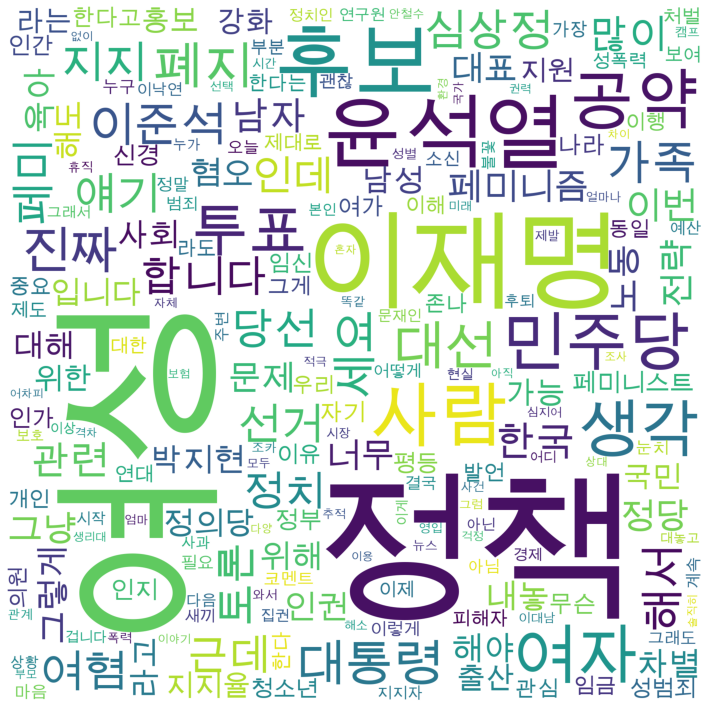

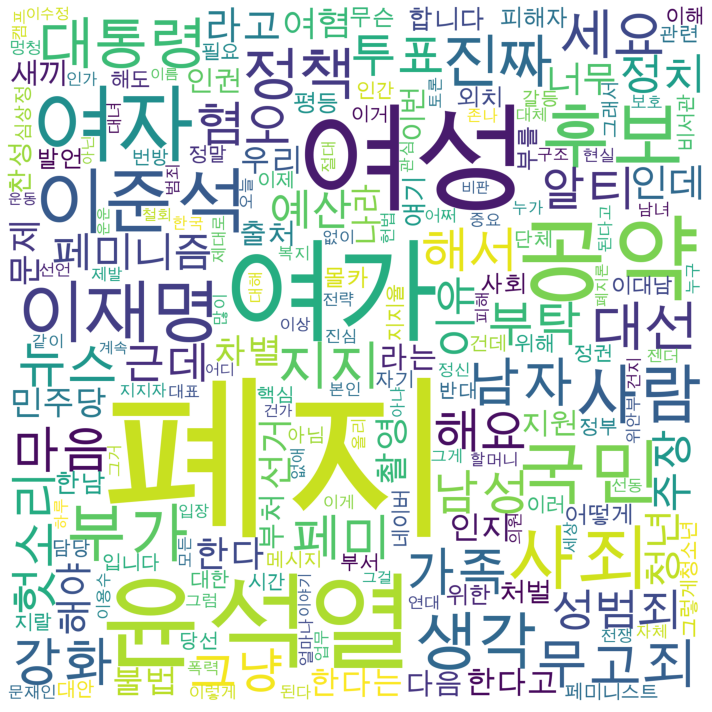

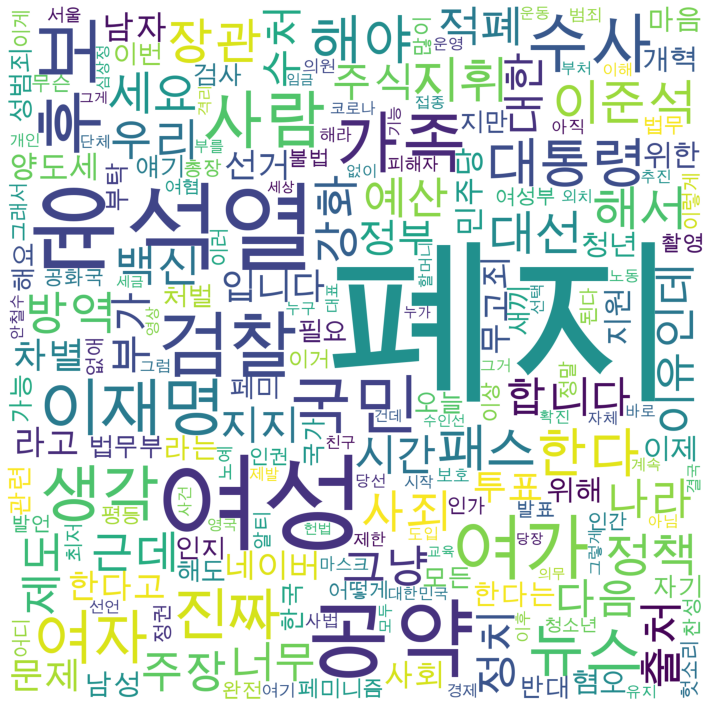

In [31]:
for idx, df in enumerate (data_list):
    words_sum = sum(df['tokenized'], [])
    c, cw = common_words(words_sum, 200)
    wordcloud(c, name_list[idx])

In [35]:
women_policy_w = women_policy.copy()
minister_m = minister.copy()
repeal_r = repeal.copy()

그림 저장: women_policy_without_wc


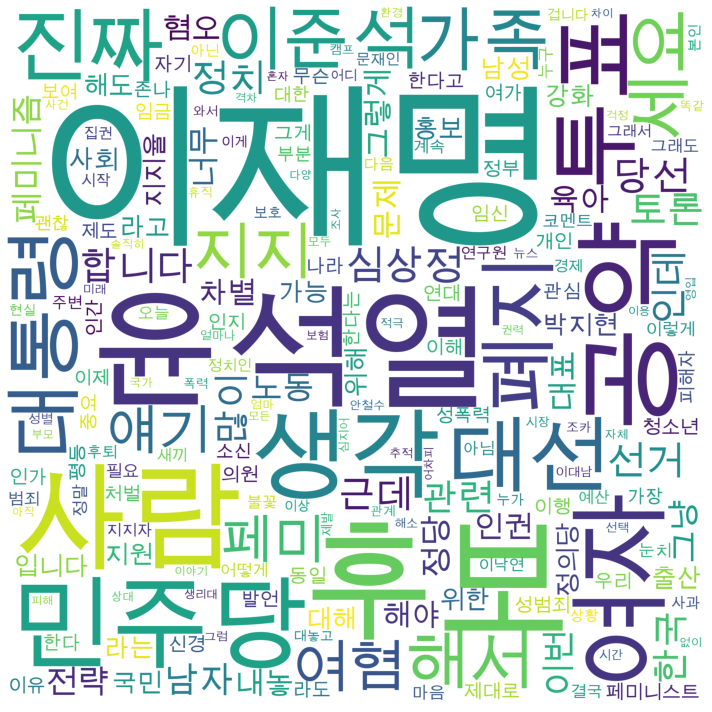

In [38]:
# women_policy without 여성, 정책
stop_words_w = ['여성', '정책']
women_policy_w['tokenized'] = women_policy_w['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(women_policy_w['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c, 'women_policy_without')

그림 저장: minister_without_wc


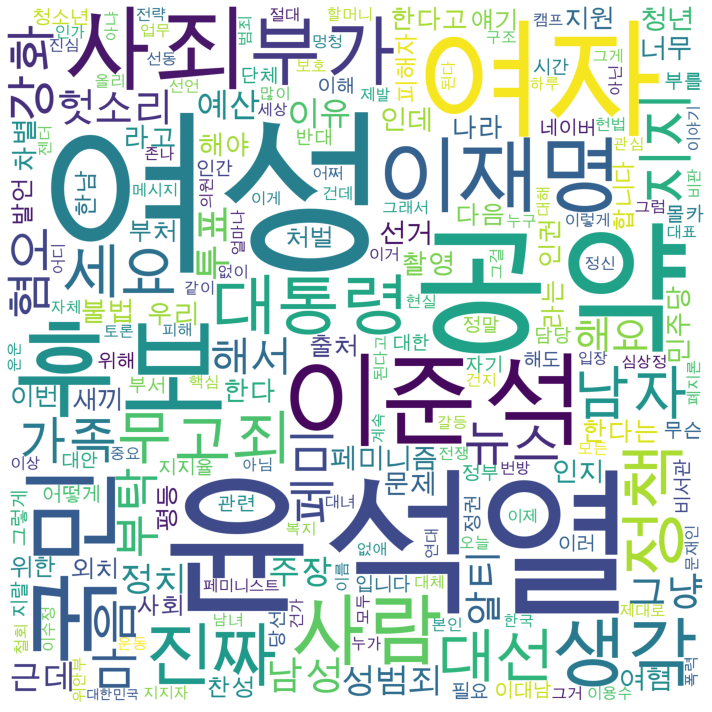

In [39]:
# minister without 여가부, 폐지
# 여가가 여가부 같으니
stop_words_m = ['여가부', '폐지', '여가']
minister_m['tokenized'] = minister_m['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_m])

words_sum = sum(minister_m['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c, 'minister_without')

그림 저장: repeal_without_wc


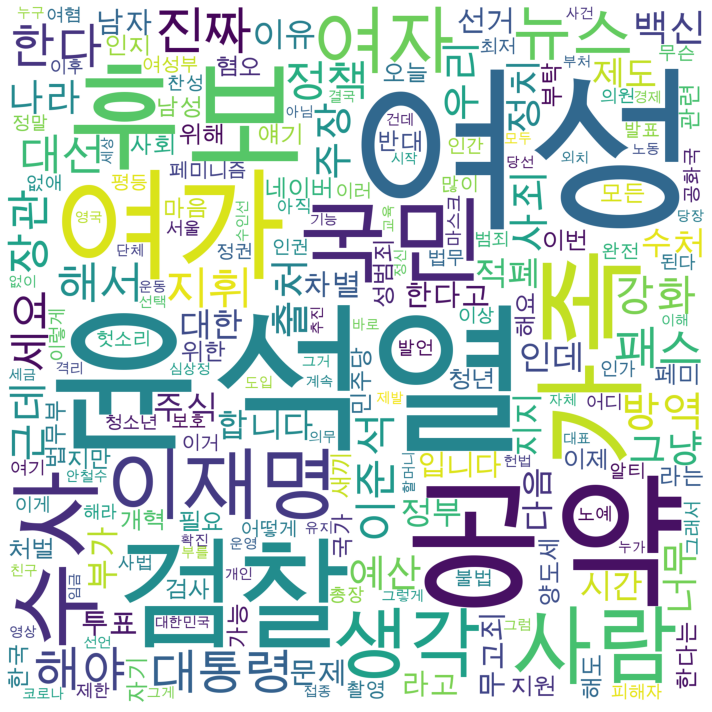

In [40]:
# repeal without 폐지
# 여가가 여가부 같으니
stop_words_r = ['폐지']
repeal_r['tokenized'] = repeal_r['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_r])

words_sum = sum(repeal_r['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c, 'repeal_without')

## the most common words by date

In [46]:
name_list = ['women_policy', 'minister', 'repeal']
data_list = [women_policy_w, minister_m, repeal_r]

In [47]:
def add_value_labels(ax, word, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(word[idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)  

In [70]:
def dataframe(df):
    df['date'] = pd.to_datetime(df['datetime']).apply(lambda x:x.date())
    df['date_re'] = df['date'].apply(lambda x:x.strftime('%Y-%m-%d'))
    
    date = []
    word_list = []
    count_list = []
    
    for i in df['date_re'].unique():
        tokenizing = sum(df[df['date_re'] == i]['tokenized'], [])
        c, cw = common_words(tokenizing, 1)
        word = cw[0][0]
        count = cw[0][1]
        date.append(i)
        word_list.append(word)
        count_list.append(count)
        
    dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
    cw_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])
    return df, cw_df

In [66]:
def commonword_graph(df, title):
    fig, ax = plt.subplots(1, figsize=(20,10))
    plot = sns.barplot(df['date'], df['count'])
    add_value_labels(ax, df['word'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title('most common word by date', fontsize=20)
    plt.legend(fontsize=15)
    save_fig(f'{title}' + '_commonword')

In [78]:
def commonword_count_graph(df, title):
    fig, ax = plt.subplots(1, figsize=(20,10))
    plot = sns.barplot(df.groupby('date').count()['date_re'].index,
                   df.groupby('date').count()['date_re'].values)
    add_value_labels(ax, df.groupby('date').count()['date_re'].values)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title('distribution by date', fontsize=20)
    plt.legend(fontsize=15)
    save_fig(f'{title}' + '_commonword_count')   

No handles with labels found to put in legend.


그림 저장: women_policy_commonword


No handles with labels found to put in legend.


그림 저장: women_policy_commonword_count


No handles with labels found to put in legend.


그림 저장: minister_commonword


No handles with labels found to put in legend.


그림 저장: minister_commonword_count


No handles with labels found to put in legend.


그림 저장: repeal_commonword


No handles with labels found to put in legend.


그림 저장: repeal_commonword_count


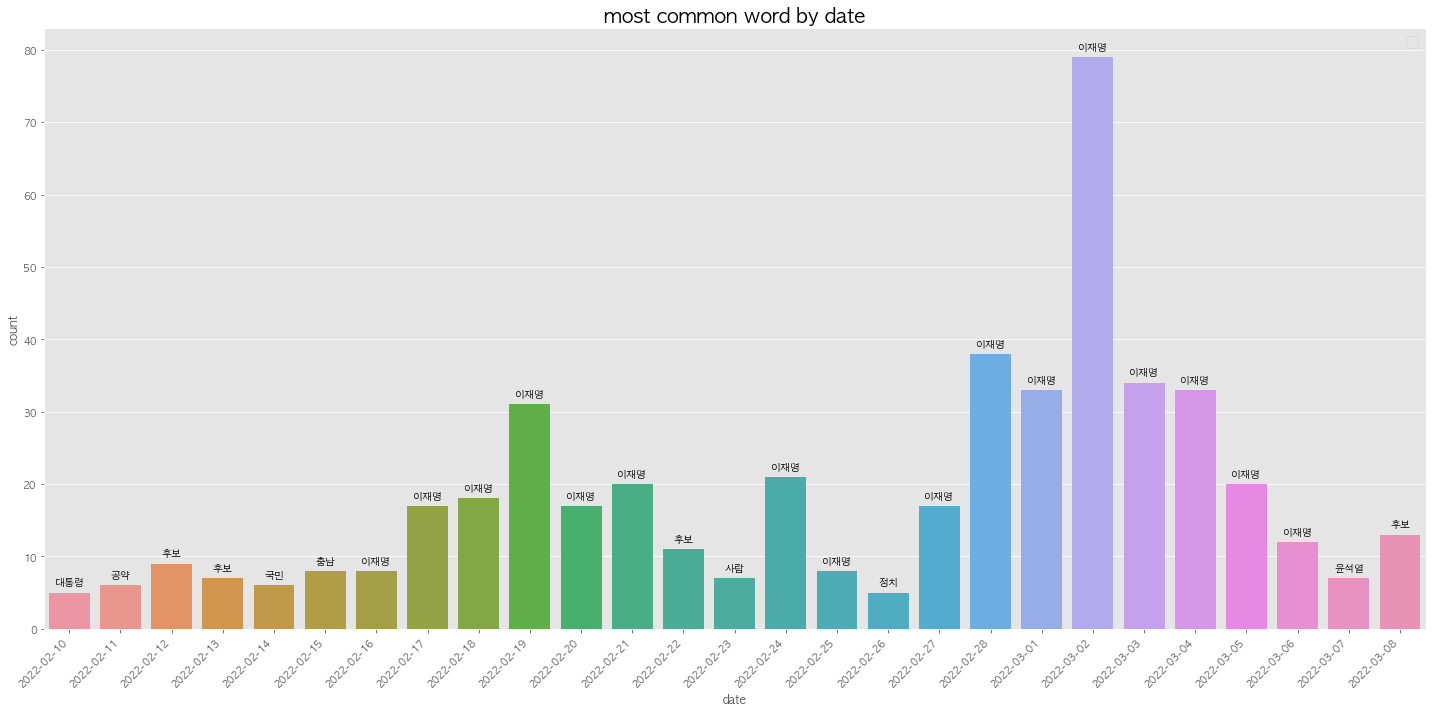

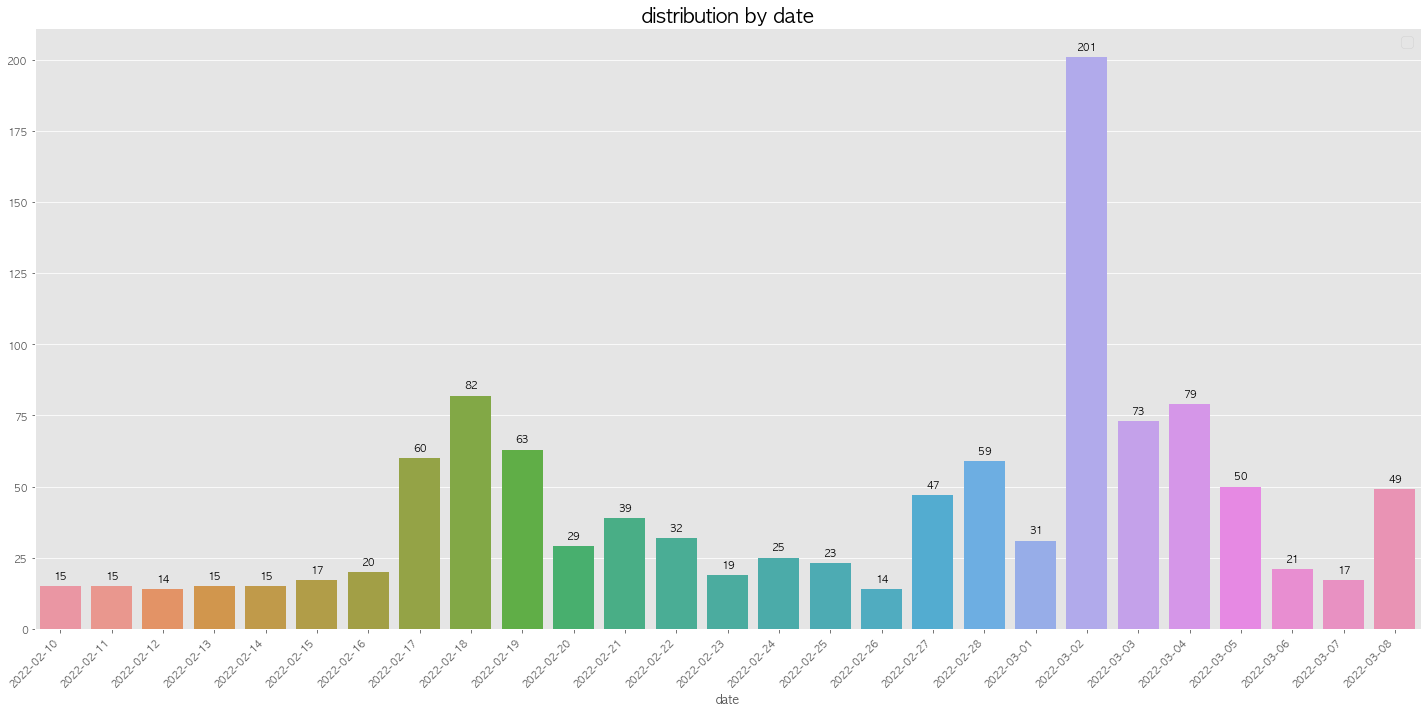

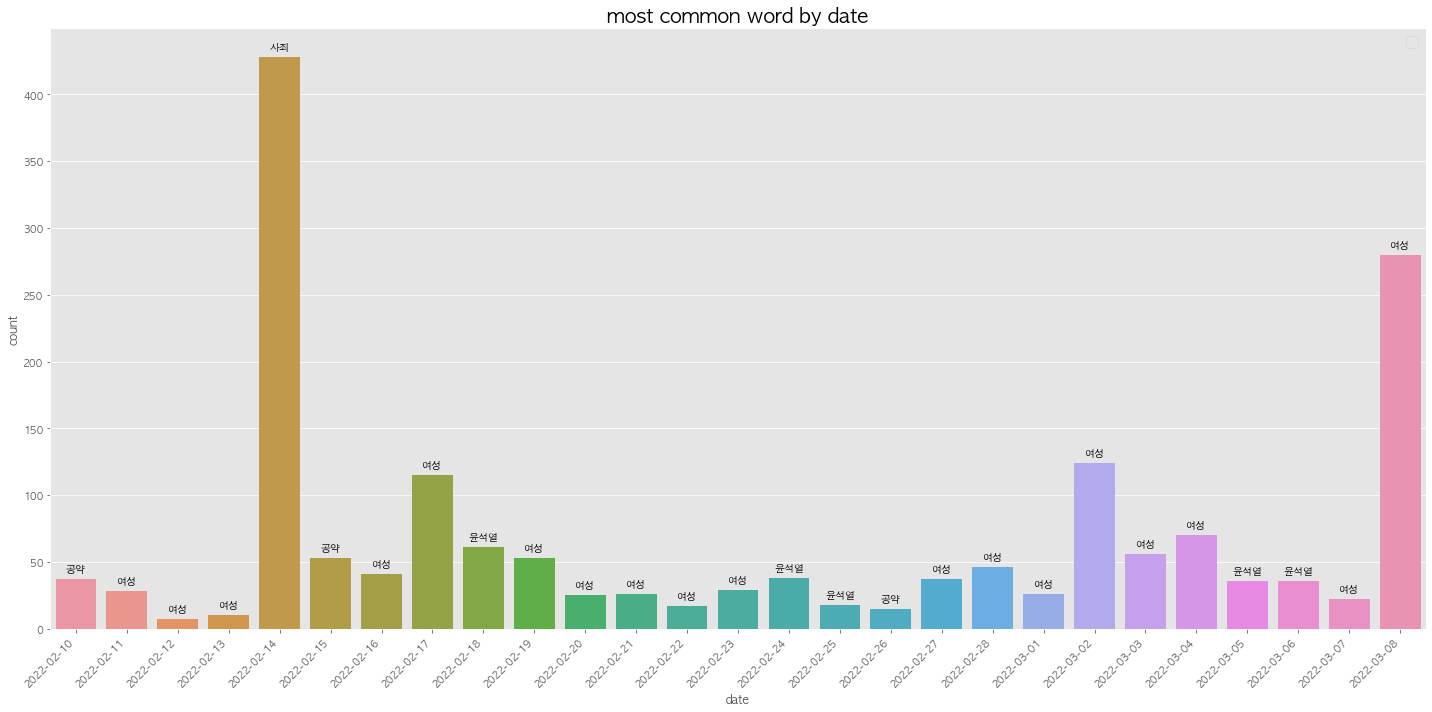

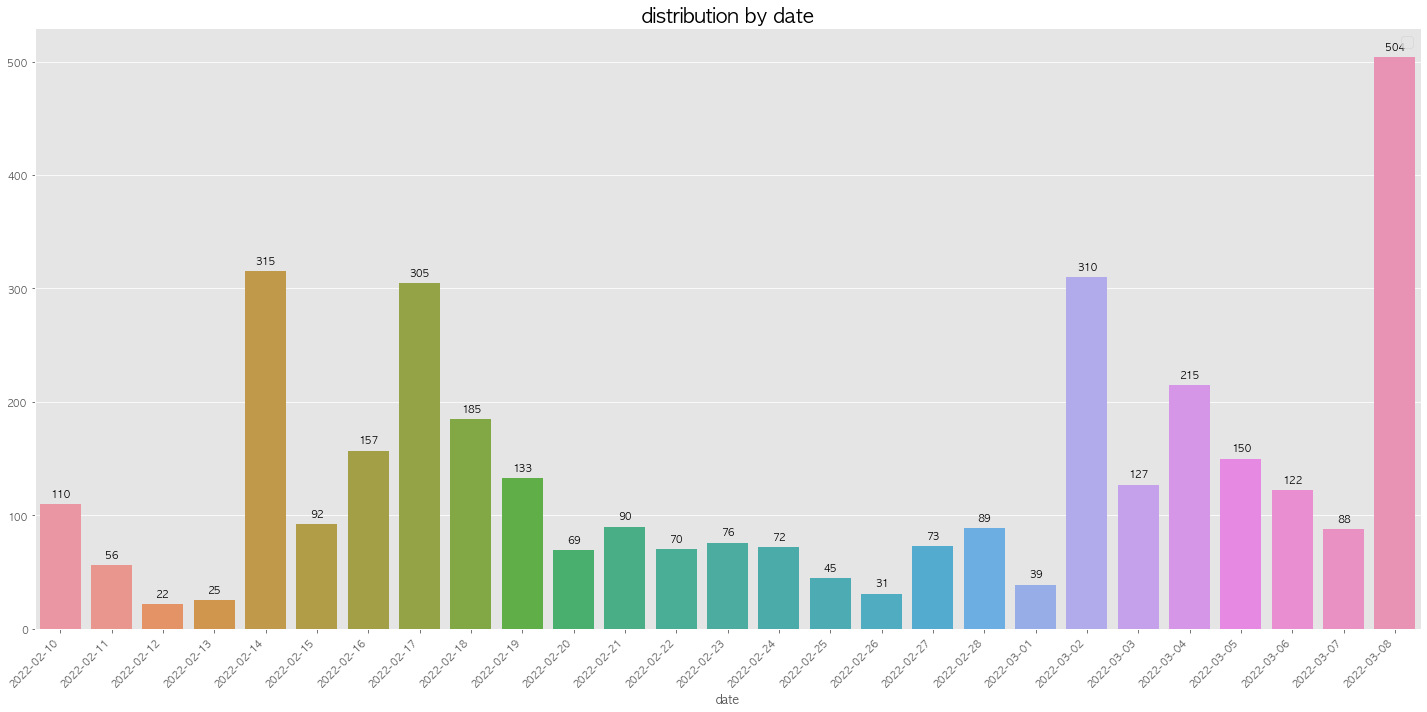

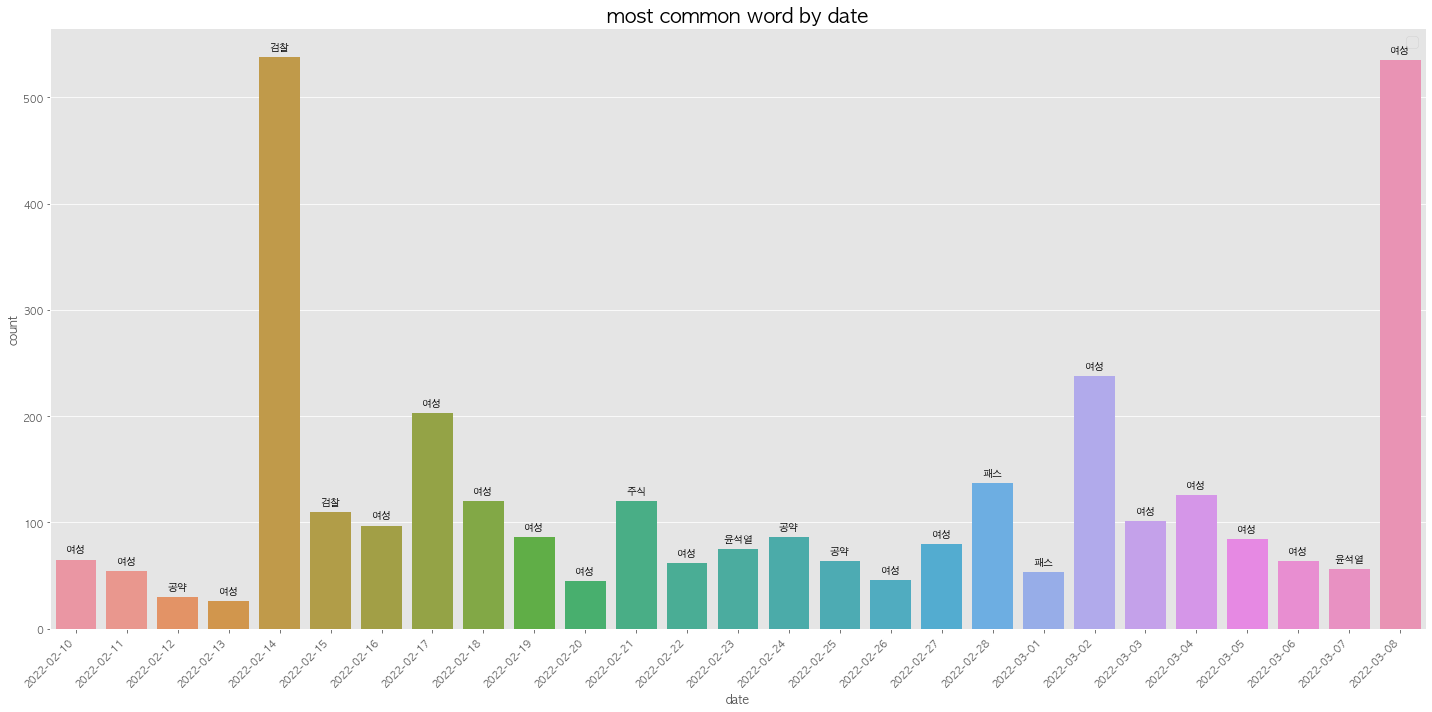

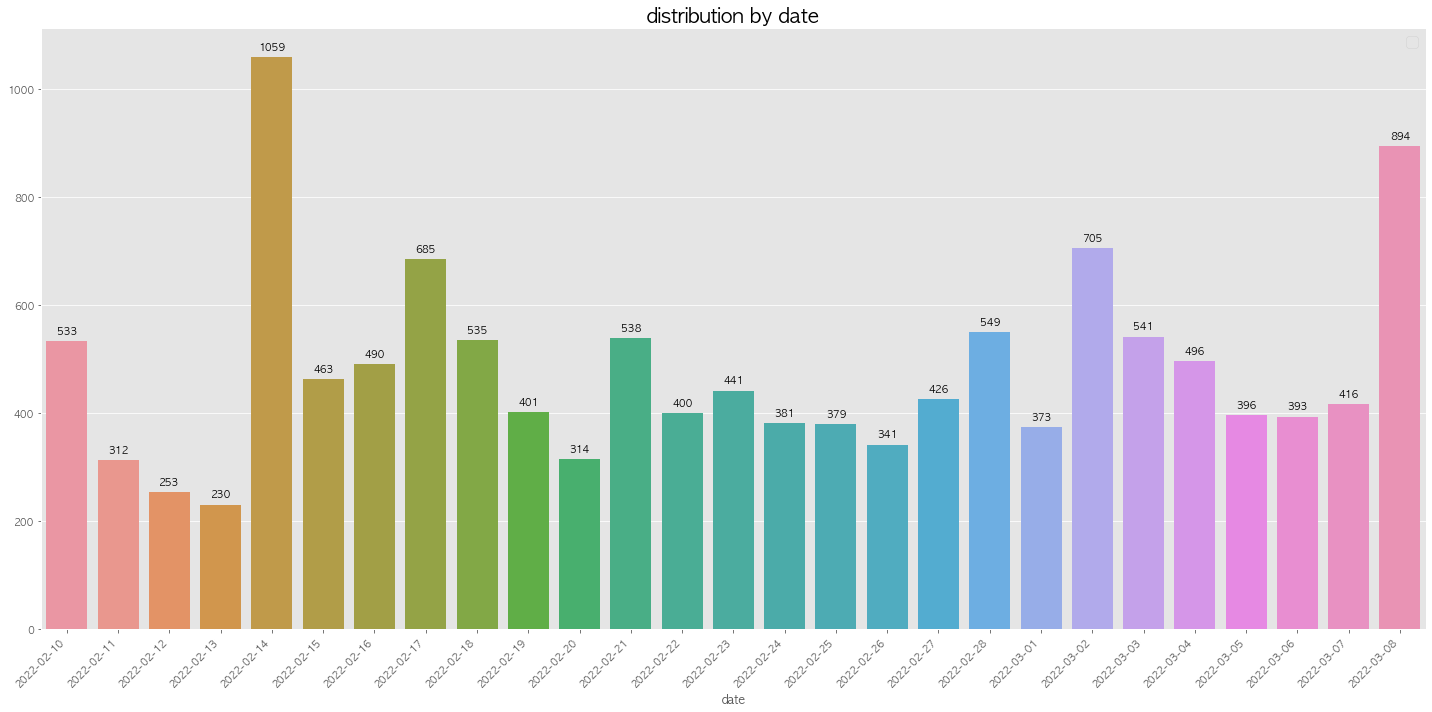

In [79]:
for idx, df in enumerate (data_list):
    df, cw_df = dataframe(df)
    commonword_graph(cw_df, name_list[idx])
    commonword_count_graph(df, name_list[idx])